In [1]:
pip install --upgrade tensorflow

     |████████████████████████████████| 454.3 MB 17 kB/s s eta 0:00:011| 381.1 MB 62.0 MB/s eta 0:00:02     |███████████████████████████     | 384.3 MB 62.0 MB/s eta 0:00:02██████████████████▉   | 409.5 MB 68.9 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 69.6 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 7.4 MB/s  eta 0:00:01
     |████████████████████████████████| 1.2 MB 47.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 61.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 62.5 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 39.9 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 81.6 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 6.2 MB/s  eta 0:00:01
     |████████████████████████████████| 4.9 MB 51.1 MB/s eta 0:00:01
     |████████████████████████████████| 146 kB 60.1 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 60.1 MB/s eta 0:00:01
     |████████

In [136]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
cleveland = pd.read_csv('heart.csv')
cleveland.loc[0:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [132]:
# remove missing data (indicated with a "?")
data = cleveland[~cleveland.isin(['?'])]
data.loc[0:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [133]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.loc[0:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [134]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.loc[0:]
# print the shape and data type of the dataframe
print(data.shape)
print(data.dtypes)
# print data characteristics, usings pandas built-in describe() function
data.describe()

(303, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


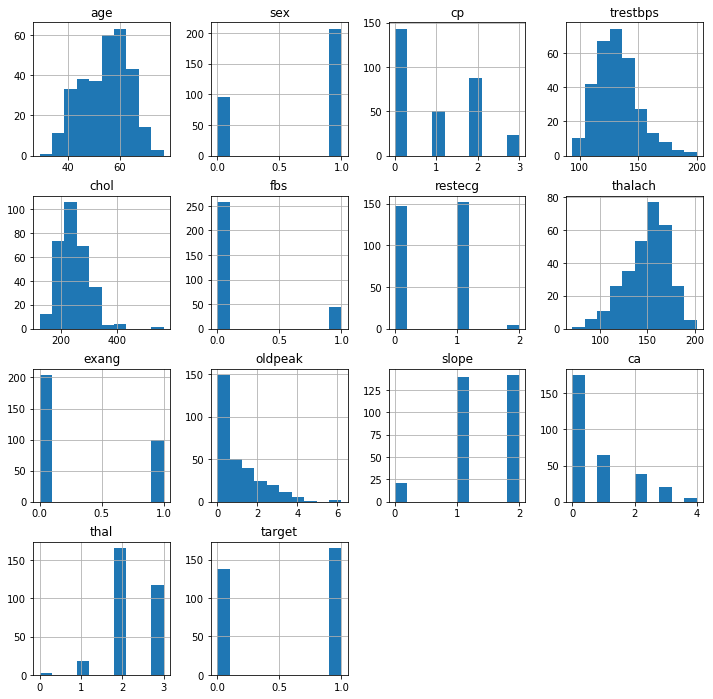

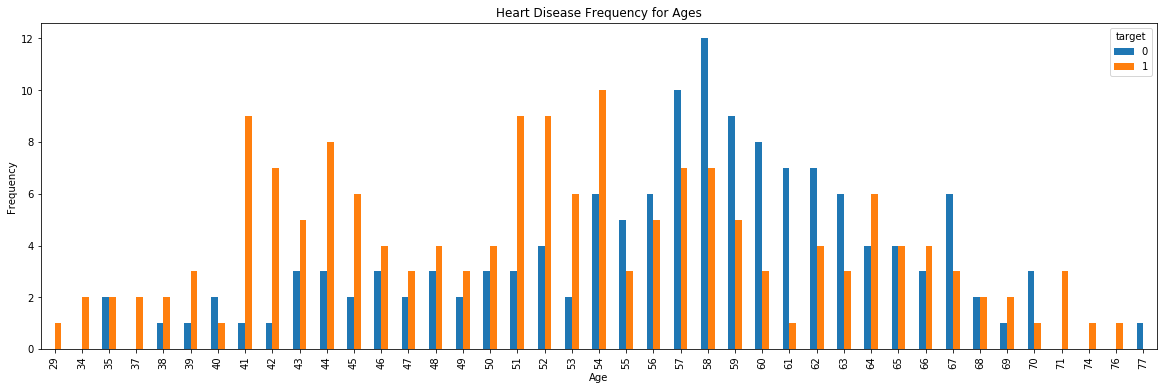

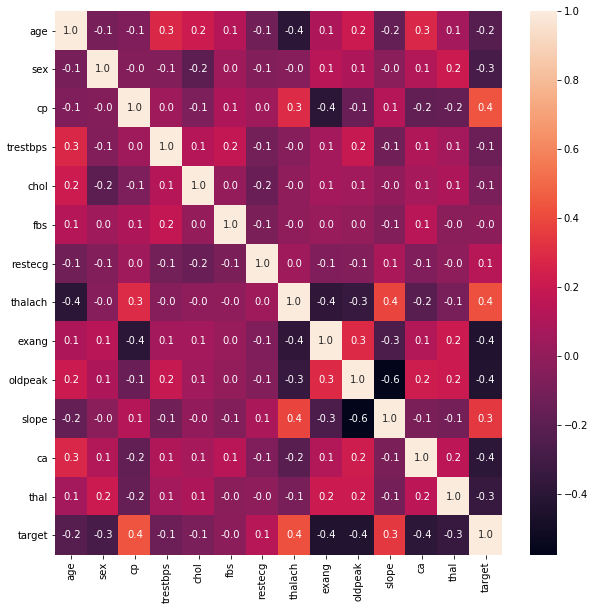

In [126]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

In [135]:
X = np.array(data.drop(['target'], 1))
y = np.array(data['target'])
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])
X_train[0]

(242, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


array([ 1.61392956, -1.46841752,  1.97312292,  0.47839125, -0.14038081,
       -0.41763453,  0.89896224,  0.05917329, -0.69663055,  0.65599028,
        0.97635214,  1.24459328, -0.51292188])

In [128]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model
model = create_model()
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 16)                224       
_________________________________________________________________
dropout_16 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_17 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 18        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


In [129]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()
Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1
print(Y_train_binary[:20])
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model
binary_model = create_binary_model()
print(binary_model.summary())
# fit the binary model on the training data
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

[1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1]
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 16)                224       
_________________________________________________________________
dropout_18 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_19 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
25/25 [==============================] - 3s 28ms/step - loss: 0.

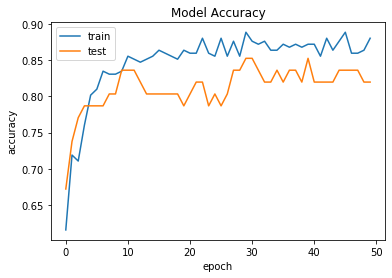

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

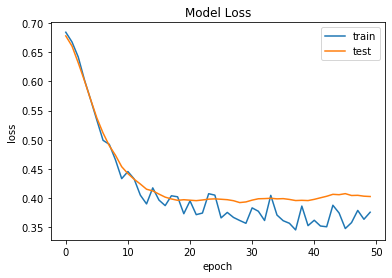

In [17]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [131]:
#initialize population
import random
best=-100000
populations =[[1, 0, 0, 0,1],[1, 1, 1, 0,1], [0, 1, 0, 0, 0],[1, 0, 0, 1, 1]]
print(type(populations))
parents=[]
new_populations = []
print(populations)

<class 'list'>
[[1, 0, 0, 0, 1], [1, 1, 1, 0, 1], [0, 1, 0, 0, 0], [1, 0, 0, 1, 1]]


In [101]:
#fitness score calculation ............
def fitness_score() :
    global populations,best
    fit_value = []
    fit_score=[]
    for i in range(4) :
        chromosome_value=0
        for j in range(4,0,-1) :
            chromosome_value += populations[i][j]*(2**(4-j))
        chromosome_value = -1*chromosome_value if populations[i][0]==1 else chromosome_value
        print(chromosome_value)
        fit_value.append(-(chromosome_value**2) + 5 )
    print(fit_value)
    fit_value, populations = zip(*sorted(zip(fit_value, populations) , reverse = True))
    best= fit_value[0]
fitness_score()

-1
-13
8
-3
[4, -164, -59, -4]


In [102]:
#print(type(populations))
#selecting parents....
def selectparent():
    global parents
    #global populations , parents
    parents=populations[0:2]
    print(type(parents))
    print(parents)
selectparent()

<class 'tuple'>
([1, 0, 0, 0, 1], [1, 0, 0, 1, 1])


In [103]:
#single-point crossover .........
def crossover() :
    global parents
    cross_point = random.randint(0,5)
    parents=parents + tuple([(parents[0][0:cross_point +1] +parents[1][cross_point+1:6])])
    parents =parents+ tuple([(parents[1][0:cross_point +1] +parents[0][cross_point+1:6])])
    print(parents)
crossover()

([1, 0, 0, 0, 1], [1, 0, 0, 1, 1], [1, 0, 0, 0, 1], [1, 0, 0, 1, 1])


In [104]:
def mutation() :
    global populations, parents
    mute = random.randint(0,49)
    if mute == 20 :
        x=random.randint(0,3)
        y = random.randint(0,4)
        parents[x][y] = 1-parents[x][y]
    populations = parents
    print(populations)
mutation()

([1, 0, 0, 0, 1], [1, 0, 0, 1, 1], [1, 0, 0, 0, 1], [1, 0, 0, 1, 1])


In [105]:
for i in range(1000) :
    fitness_score()
    selectparent() 
    crossover()
    mutation()
print("best score :")
print(best)
print("sequence........")
print(populations[0])

-1
-3
-1
-3
[4, -4, 4, -4]
<class 'tuple'>
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
-1
-1
-1
-1
[4, 4, 4, 4]
<class 'tuple'>
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
-1
-1
-1
-1
[4, 4, 4, 4]
<class 'tuple'>
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
-1
-1
-1
-1
[4, 4, 4, 4]
<class 'tuple'>
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
-1
-1
-1
-1
[4, 4, 4, 4]
<class 'tuple'>
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1

In [112]:

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                224       
_________________________________________________________________
dropout_14 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_15 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 18        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


In [113]:
# fit the model to the training data
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)

Epoch 1/50
25/25 [==============================] - 3s 32ms/step - loss: 0.6889 - accuracy: 0.5617 - val_loss: 0.6693 - val_accuracy: 0.6230
Epoch 2/50
25/25 [==============================] - 0s 8ms/step - loss: 0.6649 - accuracy: 0.6631 - val_loss: 0.6356 - val_accuracy: 0.7213
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6186 - accuracy: 0.7362 - val_loss: 0.5958 - val_accuracy: 0.7705
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 0.5905 - accuracy: 0.7603 - val_loss: 0.5542 - val_accuracy: 0.7869
Epoch 5/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5244 - accuracy: 0.8084 - val_loss: 0.5225 - val_accuracy: 0.8033
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 0.5025 - accuracy: 0.7953 - val_loss: 0.4946 - val_accuracy: 0.8033
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4936 - accuracy: 0.8012 - val_loss: 0.4728 - val_accuracy: 0.8197
Epoch 8/50
25/25 [=

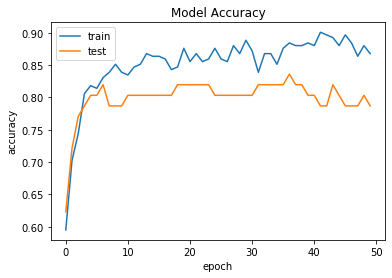

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

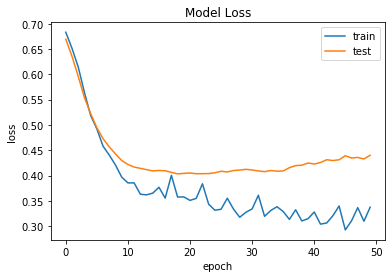

In [116]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [117]:
#Results:
# generate classification report using predictions for ANN
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Neural network Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.7868852459016393
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [119]:
# generate classification report using predictions for binary model
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Classification predicted by Genetic algorithm')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Results for Binary Classification predicted by Genetic algorithm
0.819672131147541
              precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61

